<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/heart_clinic_code_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('/content/Heart_failure_clinical_records_dataset.csv')

#Extracting Independent and dependent Variable
data_set.DEATH_EVENT.value_counts()


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [3]:
data_set.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data_set.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.837237,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.900919,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data_set.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [3]:
#feature allocation
X=data_set.drop(["DEATH_EVENT"],axis=1)
y=data_set["DEATH_EVENT"]

In [4]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [5]:
#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

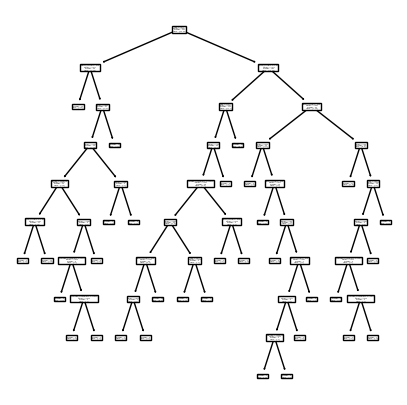

In [19]:
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias 'plt'
from sklearn import tree # Import the 'tree' module from scikit-learn

fig, ax = plt.subplots(figsize=(5,5))
# Define feature names as strings
feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
                 'ejection_fraction', 'high_blood_pressure', 'platelets',
                 'serum_creatinine', 'serum_sodium', 'sex', 'smoking',
                 'time', 'DEATH_EVENT']
tree.plot_tree(classifier, ax=ax, feature_names=feature_names) # Use tree.plot_tree to reference the function correctly
plt.show()

In [6]:
y_pred= classifier.predict(x_test)

In [7]:
print(y_pred)

[0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 0]


In [8]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [9]:
print(cm)

[[40  8]
 [ 6 21]]


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8133333333333334

In [24]:
import numpy as np  # Import the NumPy library

def predict_sample(input_data):
    # Reshape the input data into a 2D array
    input_data_reshaped = np.array(input_data).reshape(1, -1)
    # Make the prediction
    prediction = classifier.predict(input_data_reshaped)
    if prediction[0] == 0:
        return "The patient does not have heart disease"
    else:
        return "The patient has heart disease"

# Example input data for prediction
sample_input = [0, 45, 45, 0, 44, 0, 4, 50, 0, 3, 0, 0]

# Make prediction for the sample input
prediction = predict_sample(sample_input)
print("Prediction for sample input:", prediction)

Prediction for sample input: The patient has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
# Fix the variable name here to match the name used later.
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Dictionary to store models and their accuracies
models = {
    "SVM": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    # Also fix this variable name to remove the underscore
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"Accuracy of {name}: {accuracy}")

Accuracy of SVM: 0.8133333333333334
Accuracy of Random Forest: 0.84
Accuracy of Decision Tree: 0.8
